<a href="https://colab.research.google.com/github/BKousha/FloorPlanSegmentation/blob/main/mask_to_category.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'Colab Notebooks'
'Copy of Predictive Maintenance Checklist.gdoc'
 FloorPlan_samples
 model_best_val_loss_var.pkl
 Processed_Floor_Plans
 ShotBot
'SNN_soft shadow network for image compositing.pdf'
 test.txt


In [59]:
from tqdm import tqdm
import cv2
import numpy as np
import glob as glob
import os as os
import matplotlib.pyplot as plt

Number_Category=13

In [60]:
mask_folder = '/content/drive/MyDrive/Processed_Floor_Plans/FP_processed'
translated_folder = '/content/drive/MyDrive/Processed_Floor_Plans/FP_processed/Category'

In [61]:
color_mapping = {
    (244, 31, 46): 1,    # rooms
    (246, 77, 89): 1,    # rooms (alternative RGB definition)
    (70, 247, 22): 2,    # hallway
    (248, 172, 98): 3,   # kitchen
    (182, 112, 80): 3,   # kitchen (alternative RGB definition)
    (244, 190, 96): 3,   # kitchen (alternative RGB definition)
    (252, 226, 49): 4,   # columns
    (182, 11, 80): 5,    # mep
    (116, 53, 54): 5,    # mep
    (136, 208, 216): 6,  # windows
    (129, 219, 227): 6,  # windows
    (131, 217, 225): 6,  # windows
    (57, 52, 251): 7,    # doors
    (42, 75, 97): 7,     # doors
    (97, 97, 110): 7,    # doors
    (207, 81, 216): 8,   # glass_doors
    (223, 79, 165): 8,   # glass_doors
    (153, 109, 89): 9,   # bathrooms
    (128, 73, 48): 9,    # bathrooms
    (214, 194, 223): 10, # elevators
    (199, 184, 185): 10, # elevators (alternative RGB definition)
    (166, 162, 160): 11, # stairs
    (197, 141, 115): 12, # storage
    (193, 113, 77): 12,  # storage
    (105, 104, 159): 13, # elevator_doors
}
colors = np.array(list(color_mapping.keys()))
values = np.array(list(color_mapping.values()))


In [62]:
def translate(mask,threshold=5):

  translated_array = np.zeros(mask.shape[:2], dtype=np.float32)

  # Iterate over each pixel in the image
  for i in range(mask.shape[0]):
      for j in range(mask.shape[1]):
          pixel = mask[i, j]

          # Calculate the absolute differences between the pixel and all colors
          color_diff = np.abs(pixel - colors)

          # Check if any of the color differences are within the threshold
          matching_indices = np.where(np.all(color_diff <= threshold, axis=1))

          if matching_indices[0].size > 0:
              # Get the first matching color and assign the corresponding value
              matching_color_index = matching_indices[0][0]
              matching_value = values[matching_color_index]
              translated_array[i, j] = matching_value
  return(translated_array/Number_Category)

  def translate(mask, threshold=5):
    # Calculate the absolute differences between each pixel in the mask and all colors
    color_diff = np.abs(mask[:, :, np.newaxis] - colors)

    # Check if any of the color differences are within the threshold
    matching_indices = np.where(np.all(color_diff <= threshold, axis=-1))

    # Get the matching indices and assign the corresponding values
    matching_values = values[matching_indices]

    # Create the translated array using the matching values
    translated_array = np.zeros(mask.shape[:2], dtype=np.uint8)
    translated_array[matching_indices[0], matching_indices[1]] = matching_values

    return translated_array

def doit(mask_file):
  mask = cv2.imread(image)
  mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

  translated=translate(mask,threshold=5)
  image_array_scaled = (translated * 255).astype(np.uint8)

  folder, filename = os.path.split(image)
  outputfile=translated_folder+"/"+filename

  cv2.imwrite(outputfile,image_array_scaled)


  0%|          | 0/1 [00:00<?, ?it/s]

/content/drive/MyDrive/Processed_Floor_Plans/FP_processed/47.png (1195, 970, 3) 27 9 /content/drive/MyDrive/Processed_Floor_Plans/FP_processed/Category/47.png


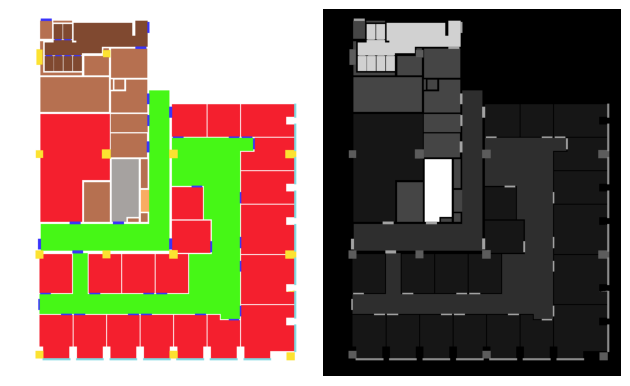

100%|██████████| 1/1 [00:21<00:00, 21.08s/it]


In [63]:
image_files = glob.glob(os.path.join(mask_folder, '*.png'))
for image in tqdm(image_files[0:1]):
  mask = cv2.imread(image)
  mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

  b,g,r = cv2.split(mask)
  shiftet_im = b + 1000 * (g + 1)  + 1000 * 1000 * (r + 1)
  shiftet_im

  translated=translate(mask,threshold=5)
  image_array_scaled = (translated * 255).astype(np.uint8)

  folder, filename = os.path.split(image)
  outputfile=translated_folder+"/"+filename


  cv2.imwrite(outputfile,image_array_scaled)
  #np.save("array_data.npy", translated)
  print(image,mask.shape,len(np.unique(shiftet_im)),len(np.unique(translated)),outputfile)
  fig, axs = plt.subplots(1, 2)
  axs[0].imshow(mask, cmap='gray')
  axs[0].axis('off')
  axs[1].imshow(image_array_scaled, cmap='gray')
  axs[1].axis('off')
  plt.tight_layout()
  plt.show()











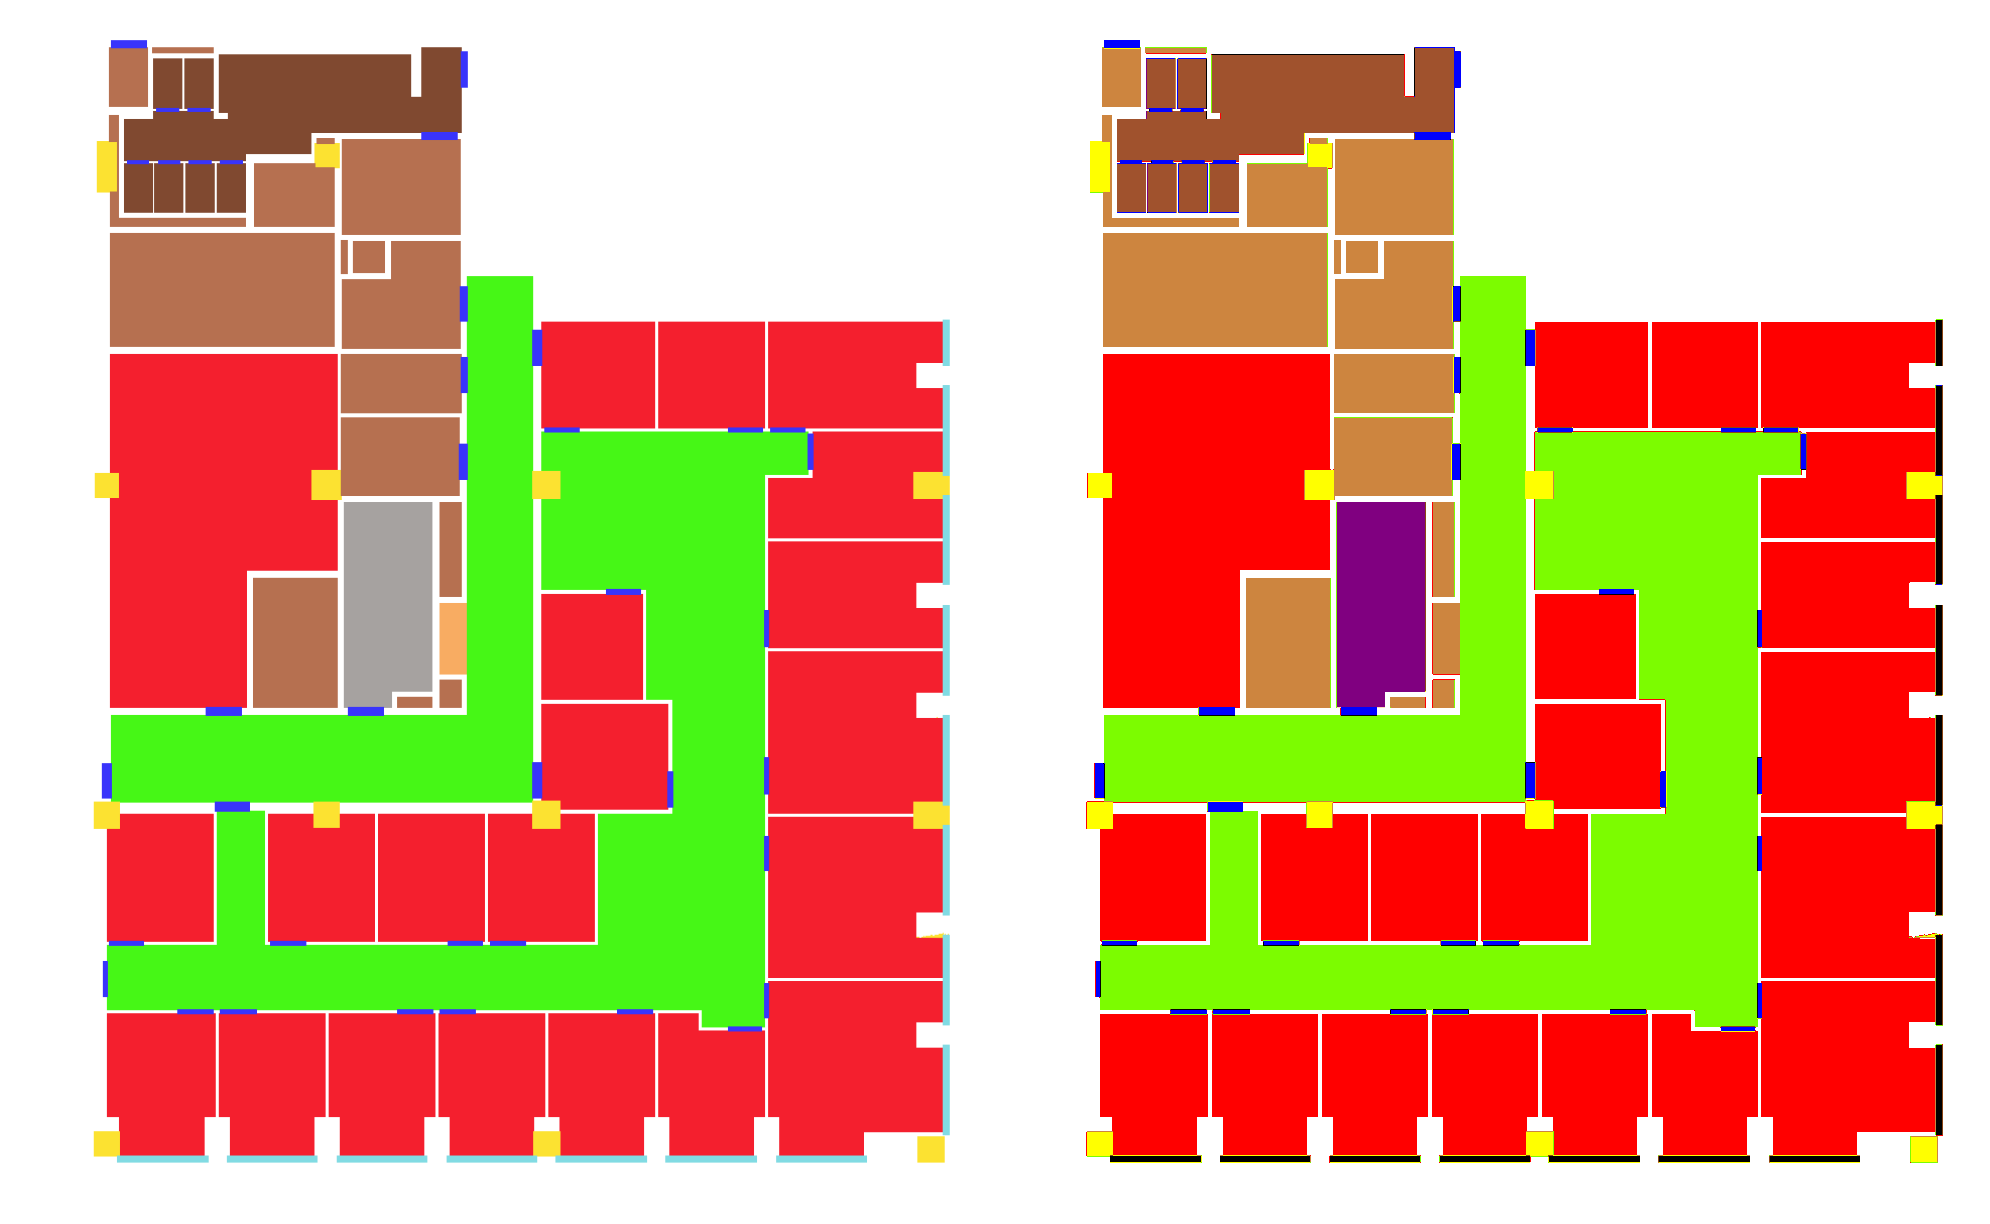

In [87]:
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap

labels = ['background',
          'room',
          'hallway',
          'kitchen',
          'columns',
          'mep',
          'windows',
          'doors',
          'glass_doors',
          'bathrooms',
          'elevators',
          'stairs',
          'storage',
          'elevator_doors'
          ]
category_colors  = ['white',      #background
                    'red',        #room
                    'lawngreen',  #hallway
                    'peru',       #kitchen
                    'yellow',     #columns
                    'saddlebrown',#mep
                    'blue',
                    'black',      #windows
                    'blue',       #doors
                    'purple',     #glass_doors
                    'sienna',      #bathrooms
                    'peachpuff',  #elevators
                    'purple'      #elevator_doors
                    ]


cmap = ListedColormap(category_colors)


fig, axs = plt.subplots(1, 2,figsize=(20, 20))
im2=axs[0].imshow(mask, cmap='gray')
axs[0].axis('off')
im1=axs[1].imshow(image_array_scaled, cmap=cmap)
axs[1].axis('off')


# cmap = plt.colors.ListedColormap(colors)
# categories = np.unique(image)
# colorbar = plt.colorbar(cmap=cmap, ticks=categories)
# colorbar.ax.set_yticklabels(labels)
# cbar2 = fig.colorbar(im2, ax=axs[1])


plt.tight_layout()
plt.show()